# Softmax(Keras)

In [1]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import mnist
import matplotlib.pyplot as plt

Using TensorFlow backend.


## 1. Load Data

我们使用keras自带的mnist数据集,由于我们的采用的损失函数```categorical_crossentropy```你的目标值应该是分类格式(即,如果你有10个类,每个样本的目标值应该是一个 10 维的向量,这个向量除了表示类别的那个索引为1,其他均为0).

于是我们可以使用[to_categorical](https://keras.io/zh/utils/#to_categorical)来将其转换为"Hot"的形式.

```python
# 考虑一组 3 个类 {0,1,2} 中的 5 个标签数组：
> labels
array([0, 2, 1, 2, 0])
# `to_categorical` 将其转换为具有尽可能多表示类别数的列的矩阵。
# 行数保持不变。
> to_categorical(labels)
array([[ 1.,  0.,  0.],
       [ 0.,  0.,  1.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.],
       [ 1.,  0.,  0.]], dtype=float32)```

In [2]:
def LoadData():
    (x_train,y_train),(x_test,y_test) = mnist.load_data()
    x_train = x_train.reshape(x_train.shape[0],-1) / 255
    x_test = x_test.reshape(x_test.shape[0],-1) / 255

    n_classes = len(np.unique(y_train))
    y_train_hot = keras.utils.to_categorical(y_train,n_classes)
    y_test_hot = keras.utils.to_categorical(y_test,n_classes)

    return n_classes,x_train,y_train_hot,x_test,y_test_hot

In [3]:
n_classes,x_train,y_train_hot,x_test,y_test_hot = LoadData()

## 2. Build Softmax Model

这里我们采用Sequential的形式,还是和之前一样:

(1) 初始化Sequential模型:```Sequential()```.

(2) 增加三层普通层Dense,神经节点数分别为24,12,10,前两次采用```relu```,初始化方式为```he_normal```.

(3) Optimizer我们选择Adam,损失我们使用```categorical_crossentropy```.

(4) 编译模型,输出加入accuracy.

(5) 训练模型,```batch_size = 64```,```validation_data=(val_datas,val_labels)```,最后epochs为20次.

In [13]:
def softmaxModel(data,labels,val_datas,val_labels,lr,epochs,BATCH_SIZE):
    
    m,n = data.shape
    initializer = keras.initializers.he_normal(seed=1)
    model = Sequential()
    model.add(Dense(units=25,input_shape=(n,),activation='relu',kernel_initializer=initializer))
    model.add(Dense(units=12,activation='relu',kernel_initializer=initializer))
    model.add(Dense(units=10,activation='softmax',kernel_initializer=initializer))
    

    optimizer = keras.optimizers.Adam(lr=lr,epsilon=1e-6)
    model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])
    
    model.fit(data,labels,batch_size=BATCH_SIZE,epochs=epochs,verbose=1,validation_data=(val_datas,val_labels))
    
    return model

In [14]:
keras.backend.clear_session() # clear session
model = softmaxModel(x_train,y_train_hot,x_test,y_test_hot,lr=0.001,epochs=20,BATCH_SIZE=64)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 26us/step - loss: 0.4973 - acc: 0.8521 - val_loss: 0.2494 - val_acc: 0.9294
Epoch 2/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.2182 - acc: 0.9359 - val_loss: 0.1970 - val_acc: 0.9429
Epoch 3/20
60000/60000 [==============================] - 2s 29us/step - loss: 0.1799 - acc: 0.9469 - val_loss: 0.1725 - val_acc: 0.9488
Epoch 4/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.1579 - acc: 0.9533 - val_loss: 0.1649 - val_acc: 0.9518
Epoch 5/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.1435 - acc: 0.9579 - val_loss: 0.1542 - val_acc: 0.9561
Epoch 6/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.1304 - acc: 0.9611 - val_loss: 0.1536 - val_acc: 0.9563
Epoch 7/20
60000/60000 [==============================] - 1s 21us/step - loss: 0.1225 - acc: 0.9635 - val_loss: 0.1432 - val_acc

训练完毕之后发现效果还是可以接受.

## 3. Plot Accuracy/Loss

我们使用```model.history.history```来提取训练过程中的loss和accuracy,当然更加建议使用Tensorbord.

In [6]:
train_loss = model.history.history['loss']
train_acc = model.history.history['acc']
val_loss = model.history.history['val_loss']
val_acc = model.history.history['val_acc']

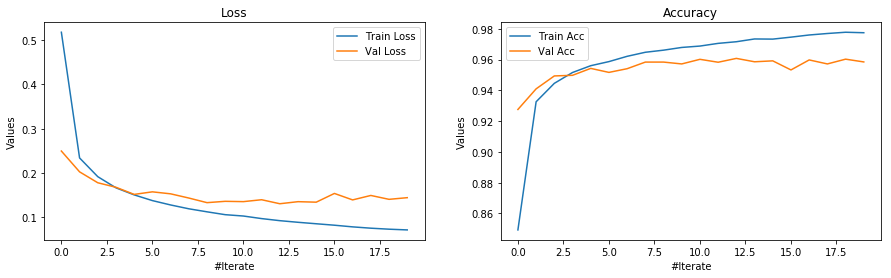

In [7]:
figure = plt.figure(figsize=(15,4))
ax1 = figure.add_subplot(1,2,1)
ax1.plot(train_loss,label="Train Loss")
ax1.plot(val_loss,label="Val Loss")
ax1.set_title('Loss')
ax1.set_xlabel('#Iterate')
ax1.set_ylabel('Values')
ax1.legend()

ax2 = figure.add_subplot(1,2,2)
ax2.plot(train_acc,label="Train Acc")
ax2.plot(val_acc,label="Val Acc")
ax2.set_title('Accuracy')
ax2.set_xlabel('#Iterate')
ax2.set_ylabel('Values')
ax2.legend()

可以看出训练样本起始的正确率就较高,看样子Keras在迭代完Mini-batchs后在进行一次validation的测试.另外模型也发生了轻微的过拟合.

## 4. Tets Image

这个部分就不在多提了,可以查看Softmax(Application)中的详细解释.

In [8]:
from PIL import Image

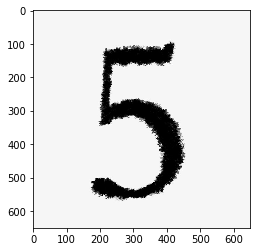

In [9]:
img = Image.open('test.jpg').convert('L') # change to gray
plt.imshow(img,cmap='gray')

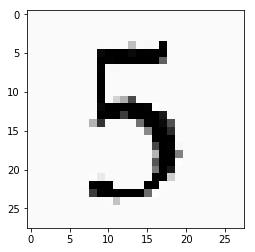

In [10]:
img = img.resize((28,28))
plt.imshow(img,cmap='gray')

In [11]:
data = np.asarray(img).reshape(1,-1) /255
print('The data shape is {}'.format(data.shape))

The data shape is (1, 784)


In [12]:
predict_ = model.predict_classes(data)
print('predict classes is: {}'.format(predict_[0]))

predict classes is: 3


很遗憾,预测错误,没关系,等待我们的CNN登场就可以很好的解决.